# Escalamiento de datos numéricos

### Transformaciones lineales

In [37]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import seaborn as sns

In [38]:
x, y = datasets.load_diabetes(return_X_y=True)
raw = x[:, None, 2]

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [39]:
minimo = raw.min()
maximo = raw.max()

xs = ((2 * raw) - minimo - maximo) / (maximo - minimo)
minimo, maximo

(np.float64(-0.09027529589850945), np.float64(0.17055522598064407))

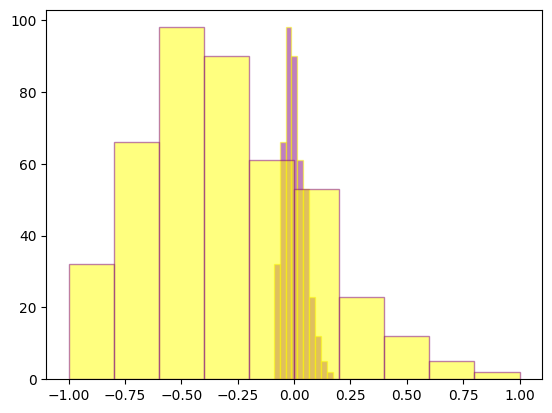

In [43]:
plt.hist(raw, color="purple", edgecolor="yellow", alpha=0.5)
plt.hist(xs, color="yellow", edgecolor="purple", alpha=0.5)
plt.show()

In [59]:
def train_model():
    linear_model.LinearRegression().fit(raw, y)

def train_scale():
    linear_model.LinearRegression().fit(xs, y)

In [60]:
raw_time = timeit.timeit(train_model, number=10000)
scaled_time = timeit.timeit(train_scale, number=10000)

raw_time, scaled_time

(3.1327686660006293, 2.965818546999799)

* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

In [69]:
mean = raw.mean()
std = raw.std()
mean, std

(np.float64(-2.2455642172282577e-16), np.float64(0.0475651494154494))

In [70]:
xsz = (raw - mean) / std

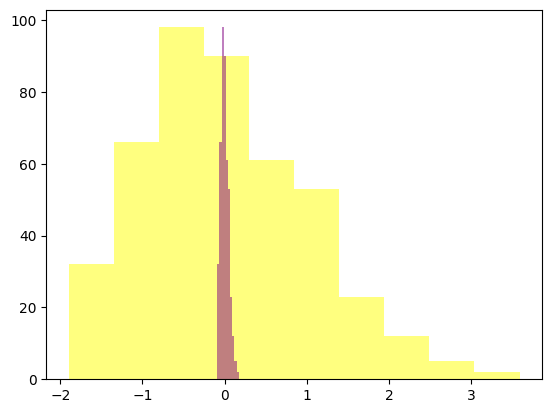

In [71]:
plt.hist(xsz, color="yellow", alpha=0.5)
plt.hist(raw, color="purple", alpha=0.5)
plt.show()

In [64]:
def train_scale_z():
    linear_model.LinearRegression().fit(xsz, y)

In [65]:
raw_time = timeit.timeit(train_model, number=10000)
scaled_time = timeit.timeit(train_scale_z, number=10000)

raw_time, scaled_time

(3.0693748150006286, 2.9550729670008877)

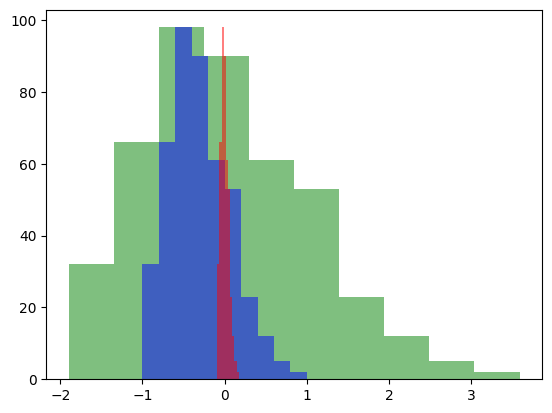

In [74]:
plt.hist(xsz, color="green", alpha=0.5)
plt.hist(xs, color="blue", alpha=0.5)
plt.hist(raw, color="red", alpha=0.5)
plt.show()

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [75]:
df = pd.read_csv('cars.csv')

In [77]:
prices = df["price_usd"]

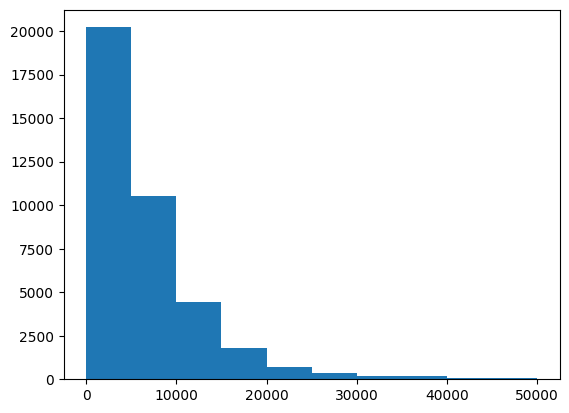

In [78]:
plt.hist(prices)
plt.show()

Transformación con $$tanh(x)$$

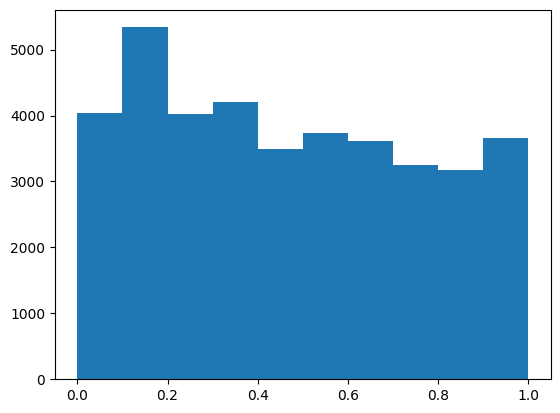

In [84]:
n = 10000
scl = df["price_usd"].apply(lambda x: np.tanh(x/n))
plt.hist(scl)
plt.show()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f569948-e9a8-454f-8f4d-a27aa1610a87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>